# __Welcome to our first Titanic Notebook__

RMS Titanic sank on 15 April 1912 in the North Atlantic Ocean. It had 2224 people on board when she got struck with an iceberg. Unfrotunately, Titanic's lifeboat system wasn't designed to hold everyone on board simultaneously and thus, her sinking lead to the death of more than 1500 people. 

The titanic dataset contains information about the passengers in variables such as PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked. The purpose of designing a prediction algorithm on this dataset is to predict based on the passenger information that whether the person survived or not. Thus it is a binary classification model.
For building a model, one needs to 
 - understand the variables (data understanding), 
 - study variable effect on the outcome (through data visualization or descriptive statistics),
 - check whether variables are correlated or not (checking multicollinearity)
 - deal with missing values (data cleaning)
 - transform variables like changing data type, normalization etc (data transformation)
 - understand the importance of variable (feature importance)
 - check if any variable need to be dropped from the model designing based on feature importance (feature selection)
 - building a predictor model (ex. classification, regression etc)
 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [3]:
df_test.tail(10)

PassengerId  Pclass                                             Name  \
408         1300       3                  Riordan, Miss. Johanna Hannah""   
409         1301       3                        Peacock, Miss. Treasteall   
410         1302       3                           Naughton, Miss. Hannah   
411         1303       1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
412         1304       3                   Henriksson, Miss. Jenny Lovisa   
413         1305       3                               Spector, Mr. Woolf   
414         1306       1                     Oliva y Ocana, Dona. Fermina   
415         1307       3                     Saether, Mr. Simon Sivertsen   
416         1308       3                              Ware, Mr. Frederick   
417         1309       3                         Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
408  female   NaN      0      0              334915    7.7208   NaN        Q  
409  female   3.0      1      1  SOTON/O.Q. 3101315   13.7750   NaN        S  
410  female   NaN      0      0              365237    7.7500   NaN        Q  
411  female  37.0      1      0               19928   90.0000   C78        Q  
412  female  28.0      0      0              347086    7.7750   NaN        S  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [6]:
df_train.dtypes[df_train.dtypes.map(lambda x: x== 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

# Data Prep

In [7]:
# Have a 'result' DataFrame ready for prediction later.
result = pd.DataFrame({"PassengerId": df_test['PassengerId']})

In [8]:
# Cleaning train and test set, identify columns to encode/scale.

col_to_encode = ['Sex', 'Embarked']
col_to_scale = ['Age', 'Fare']

for c in col_to_encode:
    df_train[c].fillna('U', inplace=True)
    df_test[c].fillna('U', inplace=True)
    
for s in col_to_scale:
    # Coerce values into numeric
    df_train[s] = pd.to_numeric(df_train[s], errors='coerce')
    df_test[s] = pd.to_numeric(df_test[s], errors='coerce')
    # Fill in blank ones
    df_train[s].fillna(0.0, inplace=True)
    df_test[s].fillna(0.0, inplace=True)

# Fit the encoders from a combination of training and test data.
combined_df = df_train.append(df_test, ignore_index=True)

In [9]:
# Extract 'Title' from names and add an encoder for it.

def extract_titles(input_df):
    '''
    Extract titles from the 'Name' column in the input dataframe.
    
    Returns:
        list: A list of extracted titles
    '''
    names = [name.split(',')[1] for name in input_df['Name'].as_matrix()]
    return [name.split('.')[0].strip() for name in names]

col_to_encode.append('Title')
combined_df['Title'] = extract_titles(combined_df)
combined_df['Title'].fillna('U', inplace=True)

In [10]:
# Fitting encoders to take on numeric values.
from sklearn.preprocessing import LabelEncoder

# Need to fit the encoders separately for predictions later!
encoders = { c: LabelEncoder() for c in col_to_encode }
for c, e in encoders.items():
    e.fit(combined_df[c].as_matrix())
    #print({c}: {e.classes_})

In [11]:
# Fitting scalers for continuous values to between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scalers = { c: MinMaxScaler() for c in col_to_scale }
for c, s in scalers.items():
    s.fit(combined_df[c].as_matrix().reshape(-1, 1))

In [12]:
def transform_data(input_df):
    '''
    Transform the input DataFrame into a format that can be used for training as well as prediction.
    
    Returns:
        pandas.DataFrame: A copy of dataframe with transformed data.
    '''
    df = input_df.copy()
    
    # ==============================
    # Creating features
    # ==============================
    # HasCabin if 'Cabin' contain a string instead of NaN.
    df['HasCabin'] = [1 if isinstance(c, str) else 0 for c in df['Cabin'].as_matrix()]
    # HasRelatives if 'SibSp' + 'Parch' > 0
    df['HasRelatives'] = [int(i[0]+i[1]>0) for i in zip(df['SibSp'].as_matrix(), df['Parch'].as_matrix())]
    # Get titles
    df['Title'] = extract_titles(df)
    
    # ==============================
    # Encode columns
    # ==============================
    for c, e in encoders.items():
        df[c] = e.transform(df[c].as_matrix())

    # ==============================
    # Scale columns
    # ==============================
    for c, s in scalers.items():
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c].fillna(0.0, inplace=True)
        df[c] = s.transform(df[c].as_matrix().reshape(-1, 1))
        #df[c] = round(df[c], 3)
        
    col_to_drop = ['PassengerId','Name', 'Ticket', 'Cabin']
    return df.drop(col_to_drop, axis=1)

In [13]:
def get_targets(input_df):
    '''
    Split the data into features and labels.
    
    Returns:
        tuple: (X, y) where X contains the features and y contains labals.
    '''
    X = input_df.drop(['Survived'], axis=1).as_matrix()
    y = input_df['Survived'].as_matrix()
    return X, y

In [14]:
from sklearn.model_selection import train_test_split

def split_data(features, labels, include_val=False):
    '''
    Split the input dataframe into train and test sets of ratio 60/40. If include_val is set to True, 
    The ratio between train, val, and test sets are 60/20/20.
    
    Args:
        features (2D list): a list of features.
        labels(1D list): a list of labels.
        include_val(bool, optional): Whether to include validation set.
    
    Returns:
        tuple: (X_train, X_test, y_train, y_test) if no validation set is generated, 
                otherwise (X_train, X_val, X_test, y_train, y_val, y_test)
    '''
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4)
    
    if include_val:
        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        return X_train, X_test, y_train, y_test

In [15]:
transformed_df = transform_data(df_train)
X, y = get_targets(transformed_df)
X_train, X_test, y_train, y_test = split_data(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((534, 10), (357, 10), (534,), (357,))


# Model Training

In [16]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print "Accuracy is: %s" %round(score*100, 2) + " %"

Accuracy is: 85.43 %


# Predict Test Set

In [17]:
test_data = transform_data(df_test).as_matrix()
result['Survived'] = model.predict(test_data)
result.to_csv('./output.csv', index=False)

## Neural network classification

In [18]:
y = y.reshape(891,1)
test = np.array([y, -(y-1)]).T
y = test[0] # create two classes for the output
X_train, X_test, y_train, y_test = split_data(X, y)

In [19]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 1000
batch_size = 64

# Network parameters
n_hidden_1 = 10 # first layer
n_hidden_2 = 10 # second layer
n_input = X_train.shape[1] # number of features
n_class = 2 # number of classes

def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [None, n_x])
    Y = tf.placeholder(tf.float32, [None, n_y])
    return X,Y

def initialize_parameters():
    W1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
    b1 = tf.Variable(tf.random_normal([n_hidden_1]))
    W2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
    b2 = tf.Variable(tf.random_normal([n_hidden_2]))
    W3 = tf.Variable(tf.random_normal([n_hidden_2, n_class]))
    b3 = tf.Variable(tf.random_normal([n_class]))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

def forward_propagation(x, parameters):
    # Hidden layers with RELU activation
    z1 = tf.add(tf.matmul(x, parameters["W1"]), parameters["b1"])
    a1 = tf.nn.relu(z1)
    
    # Hidden layers with RELU activation
    z2 = tf.add(tf.matmul(a1, parameters["W2"]), parameters["b2"])
    a2 = tf.nn.relu(z2)
    
    # Ouput layer with linear activation
    z3 = tf.add(tf.matmul(a2, parameters["W3"]), parameters["b3"])
    return z3

In [20]:
def titanic_model(X_train, y_train, X_test, y_test, learning_rate = learning_rate,
                 num_epochs = num_epochs, batch_size = batch_size):
    tf.set_random_seed(1)
    (m, n_x) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = y_train.shape[1]
    costs = []
    
    x_nn, y_nn = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters()
    
    z3 = forward_propagation(x_nn, parameters)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = z3, labels = y_nn))
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.initialize_all_variables()
    
    with tf.Session() as sess:
        sess.run(init)
        # Training cycle
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(len(X_train) / batch_size)
            X_batches = np.array_split(X_train, num_minibatches)
            Y_batches = np.array_split(y_train, num_minibatches)
        
            for i in range(num_minibatches):
                batch_x, batch_y = X_batches[i], Y_batches[i]
            
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict = {x_nn: batch_x, y_nn: batch_y})
                    
                epoch_cost += minibatch_cost / num_minibatches
            
            if epoch % 100 == 0:
                print "Cost after epoch %i: %f" % (epoch, epoch_cost)
            if epoch % 5 == 0:
                costs.append(epoch_cost)
            
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
        parameters = sess.run(parameters)
        print "Parameters have been trained!"
    
        correct_prediction = tf.equal(tf.argmax(z3, 1), tf.argmax(y_nn, 1))
    
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
        print "Train accuracy:" , accuracy.eval({x_nn: X_train, y_nn: y_train})
        print "Test accuracy:", accuracy.eval({x_nn: X_test, y_nn: y_test})
        
        return parameters

Cost after epoch 0: 7.598319
Cost after epoch 100: 0.611981
Cost after epoch 200: 0.457291
Cost after epoch 300: 0.397404
Cost after epoch 400: 0.387429
Cost after epoch 500: 0.377096
Cost after epoch 600: 0.370885
Cost after epoch 700: 0.367965
Cost after epoch 800: 0.366430
Cost after epoch 900: 0.364373


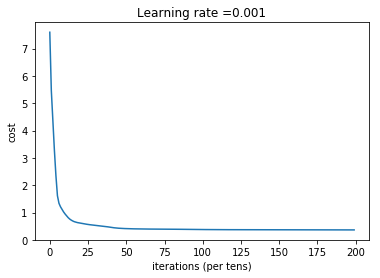

Parameters have been trained!
Train accuracy: 0.838951
Test accuracy: 0.759104


In [21]:
parameters = titanic_model(X_train, y_train, X_test, y_test)

In [22]:
test_data_float32 = test_data.astype('float32')
x_nn_predict = tf.placeholder(tf.float32, [None, test_data_float32.shape[1]])

z3_predict = forward_propagation(x_nn_predict, parameters)
p = tf.argmax(z3_predict, 1)

sess = tf.Session()
prediction = sess.run(p, feed_dict =  {x_nn_predict: test_data_float32})

result_nn = pd.DataFrame({"PassengerId": df_test['PassengerId']})
result_nn['Survived'] = model.predict(test_data)
result_nn.to_csv('./output_nn.csv', index=False)